In [0]:
%tensorflow_version 2.x
import tensorflow as tf

TensorFlow 2.x selected.


In [0]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [0]:
tokenizer = Tokenizer(num_words=100,
                      oov_token='<OOV')

sentences = [
             'I love my dog',
             'I love my cat',
             'You love my dog!',
             'I was born in Korea and graduated University in USA.'
            ]

In [0]:
tokenizer.fit_on_texts(sentences)

In [0]:
# 단어에 인덱스를 줌
## 인덱스는 순서 없음!
word_index = tokenizer.word_index
print(word_index)

{'<OOV': 1, 'i': 2, 'love': 3, 'my': 4, 'dog': 5, 'in': 6, 'cat': 7, 'you': 8, 'was': 9, 'born': 10, 'korea': 11, 'and': 12, 'graduated': 13, 'university': 14, 'usa': 15}


In [0]:
index_word = tokenizer.index_word
print(index_word)

{1: '<OOV', 2: 'i', 3: 'love', 4: 'my', 5: 'dog', 6: 'in', 7: 'cat', 8: 'you', 9: 'was', 10: 'born', 11: 'korea', 12: 'and', 13: 'graduated', 14: 'university', 15: 'usa'}


In [0]:
sequences = tokenizer.texts_to_sequences(sentences)
sequences

[[2, 3, 4, 5],
 [2, 3, 4, 7],
 [8, 3, 4, 5],
 [2, 9, 10, 6, 11, 12, 13, 14, 6, 15]]

In [0]:
# 길이 맞추기
## 제일 긴거에 맞춰 앞에 0을 붙여줌
padded = pad_sequences(sequences)
print(padded)

[[ 0  0  0  0  0  0  2  3  4  5]
 [ 0  0  0  0  0  0  2  3  4  7]
 [ 0  0  0  0  0  0  8  3  4  5]
 [ 2  9 10  6 11 12 13 14  6 15]]


In [0]:
from tensorflow import keras
from tensorflow.keras.layers import Dense, LSTM, Embedding, Dropout, Bidirectional
from tensorflow.keras.models import Sequential
import tensorflow_datasets as tfds
import numpy as np

In [0]:
imdb, info = tfds.load("imdb_reviews/subwords8k", with_info=True, 
                       as_supervised=True)
imdb

{'test': <DatasetV1Adapter shapes: ((None,), ()), types: (tf.int64, tf.int64)>,
 'train': <DatasetV1Adapter shapes: ((None,), ()), types: (tf.int64, tf.int64)>,
 'unsupervised': <DatasetV1Adapter shapes: ((None,), ()), types: (tf.int64, tf.int64)>}

In [0]:
train_dataset, test_dataset = imdb['train'],imdb['test']

In [0]:
# tensor형 데이터는 numpy로 변경해서 확인해야함
for stmt, label in train_dataset.take(1): 
  print(stmt)
  print(label)

tf.Tensor(
[  62   18   41  604  927   65    3  644 7968   21   35 5096   36   11
   43 2948 5240  102   50  681 7862 1244    3 3266   29  122  640    2
   26   14  279  438   35   79  349  384   11 1991    3  492   79  122
  188  117   33 4047 4531   14   65 7968    8 1819 3947    3   62   27
    9   41  577 5044 2629 2552 7193 7961 3642    3   19  107 3903  225
   85  198   72    1 1512  738 2347  102 6245    8   85  308   79 6936
 7961   23 4981 8044    3 6429 7961 1141 1335 1848 4848   55 3601 4217
 8050    2    5   59 3831 1484 8040 7974  174 5773   22 5240  102   18
  247   26    4 3903 1612 3902  291   11    4   27   13   18 4092 4008
 7961    6  119  213 2774    3   12  258 2306   13   91   29  171   52
  229    2 1245 5790  995 7968    8   52 2948 5240 8039 7968    8   74
 1249    3   12  117 2438 1369  192   39 7975], shape=(163,), dtype=int64)
tf.Tensor(0, shape=(), dtype=int64)


In [0]:
encoder = info.features['text'].encoder

In [0]:
for stmt, label in train_dataset.take(1): 
  print(stmt)
  print(label)
  print(encoder.decode(stmt))

tf.Tensor(
[  62   18   41  604  927   65    3  644 7968   21   35 5096   36   11
   43 2948 5240  102   50  681 7862 1244    3 3266   29  122  640    2
   26   14  279  438   35   79  349  384   11 1991    3  492   79  122
  188  117   33 4047 4531   14   65 7968    8 1819 3947    3   62   27
    9   41  577 5044 2629 2552 7193 7961 3642    3   19  107 3903  225
   85  198   72    1 1512  738 2347  102 6245    8   85  308   79 6936
 7961   23 4981 8044    3 6429 7961 1141 1335 1848 4848   55 3601 4217
 8050    2    5   59 3831 1484 8040 7974  174 5773   22 5240  102   18
  247   26    4 3903 1612 3902  291   11    4   27   13   18 4092 4008
 7961    6  119  213 2774    3   12  258 2306   13   91   29  171   52
  229    2 1245 5790  995 7968    8   52 2948 5240 8039 7968    8   74
 1249    3   12  117 2438 1369  192   39 7975], shape=(163,), dtype=int64)
tf.Tensor(0, shape=(), dtype=int64)
This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironsid

In [0]:
simple_stmt = 'Hello Tensorflow NLP'

encoded_sample = encoder.encode(simple_stmt)
print(encoded_sample)

[4025, 222, 6307, 2327, 2934, 7961, 8007, 8005, 8009]


In [0]:
encoder.decode(encoded_sample)

'Hello Tensorflow NLP'

In [0]:
# prepare data for training

BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_ds = train_dataset.shuffle(BUFFER_SIZE).padded_batch(BATCH_SIZE, train_dataset.output_shapes)
test_ds = test_dataset.padded_batch(BATCH_SIZE, test_dataset.output_shapes)

In [0]:
# 가변적이라 none
train_ds.output_shapes

(TensorShape([None, None]), TensorShape([None]))

In [0]:
# 데이터 개수 확인
encoder.vocab_size

8185

In [0]:
# model 생성
## 8185개의 데이터가 64개의 demension을 가진 모델 생성
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(encoder.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.Adam(1e-4),metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 64)          523840    
_________________________________________________________________
bidirectional_2 (Bidirection (None, 128)               66048     
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 598,209
Trainable params: 598,209
Non-trainable params: 0
_________________________________________________________________


In [0]:
num_epochs = 5
history = model.fit(train_ds, epochs=num_epochs, validation_data=test_ds, verbose=2)

Epoch 1/5
391/391 - 73s - loss: 0.6292 - accuracy: 0.6211 - val_loss: 0.4287 - val_accuracy: 0.8178
Epoch 2/5
391/391 - 71s - loss: 0.3471 - accuracy: 0.8614 - val_loss: 0.3461 - val_accuracy: 0.8609
Epoch 3/5
391/391 - 72s - loss: 0.2532 - accuracy: 0.9046 - val_loss: 0.3311 - val_accuracy: 0.8705
Epoch 4/5
391/391 - 72s - loss: 0.2114 - accuracy: 0.9249 - val_loss: 0.3591 - val_accuracy: 0.8627
Epoch 5/5
391/391 - 72s - loss: 0.1853 - accuracy: 0.9352 - val_loss: 0.3584 - val_accuracy: 0.8624


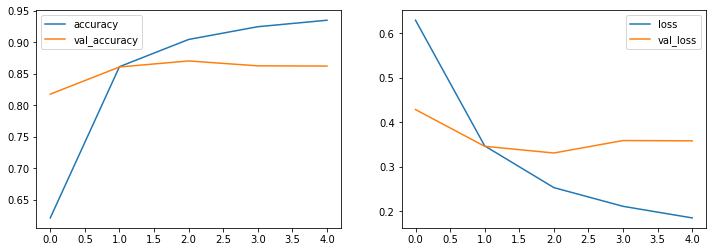

In [0]:
import matplotlib.pyplot as plt

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12,4))

ax1.plot(history.history['accuracy'],label='accuracy')
ax1.plot(history.history['val_accuracy'],label='val_accuracy')
ax1.legend()

ax2.plot(history.history['loss'],label='loss')
ax2.plot(history.history['val_loss'],label='val_loss')
ax2.legend()


In [0]:
test_sample = ('This movie was not good. Really beautiful actors but boring')
encoded_sample_pred_text = encoder.encode(test_sample)

In [0]:
# encoding 한 변수 차원 넓혀서 predict
## 지금은 한문장이지만 일차원, 원래는 여러 문장을 넣기 때문에 다차원임
predictions = model.predict(tf.expand_dims(encoded_sample_pred_text, 0))
predictions

array([[0.375796]], dtype=float32)